In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

path = "h2o/h2o"

files = [x for x in os.listdir(path) if x.__contains__(".out")]
equil = [x for x in os.listdir(path) if x.__contains__("equil")]
peturbed = [x for x in os.listdir(path) if x.__contains__("peturbed")]






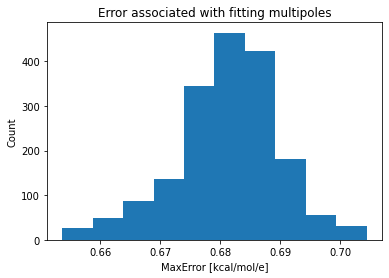

In [2]:
data_dictionary = {}

rmse_max = []
rmse_max_close = []
rmse_max_mid = []
rmse_max_far = []

for file in peturbed:
    f = open(os.path.join(path, file)).readlines()
    
    for x in [f[-5]]:
        rmse_max.append(float(x.split()[1]))
        data_dictionary[file.split("_")[1].split(".")[0]] = [float(x.split()[1])]
    for x in [f[-4]]:
        rmse_max_close.append(float(x.split()[8]))
    for x in [f[-3]]:
        rmse_max_mid.append(float(x.split()[7]))
    for x in [f[-2]]:
        rmse_max_far.append(float(x.split()[5]))
        
plt.hist(rmse_max)
plt.xlabel("MaxError [kcal/mol/e]")
plt.ylabel("Count")
plt.title("Error associated with fitting multipoles")
plt.savefig("fitting_error.png")

518


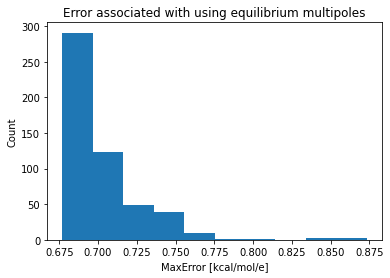

In [3]:
rmse_max = []
rmse_max_close = []
rmse_max_mid = []
rmse_max_far = []

for file in equil:
    f = open(os.path.join(path, file)).readlines()
    if len(f) > 4 and f[-1].__contains__("Did analysis and wrote slice data"):
        for x in [f[-5]]:
            rmse_max.append(float(x.split()[1]))
            data_dictionary[file.split("_")[1].split(".")[0]].append(float(x.split()[1]))
        for x in [f[-4]]:
            rmse_max_close.append(float(x.split()[8]))
        for x in [f[-3]]:
            rmse_max_mid.append(float(x.split()[7]))
        for x in [f[-2]]:
            rmse_max_far.append(float(x.split()[5]))
print(len(rmse_max))        

plt.hist(rmse_max)
plt.xlabel("MaxError [kcal/mol/e]")
plt.ylabel("Count")
plt.title("Error associated with using equilibrium multipoles")
plt.savefig("conformer_error.png")

In [5]:
data = {}


code = []
fitting = []
error = []



keys = data_dictionary.keys()

for key in keys:
    if len(data_dictionary[key]) == 2:
        data[key] = data_dictionary[key]
        code.append("2{}".format(key)) # appending a 2 to be consistent with the GDMA keys
        fitting.append(data_dictionary[key][0])
        error.append(data_dictionary[key][1])

        
        
new_df = pd.DataFrame({"key": code, "fitting_error": fitting, "conformational_error": error})


new_df.to_csv("water_esp_error.csv", index=False)
#data